# Generare conoscenza dai dati con gli algoritmi

Come prima cosa cominciamo con il costruire un dataset artificiale per testare i nostri algoritmi, per fare questo ho preparato una serie di funzioni che usano le funzionalità di sklearn descritte [qui](https://scikit-learn.org/stable/datasets/sample_generators.html).
Il dataset qui sotto contiene 100 misure separabili linearmente.

In [1]:
from libs import dataset

X,y = dataset.create_simple_dataset()

Questi dataset di esempio hanno due feature in modo da poter essere mostrati facilmente su un grafico qui sotto un esempio

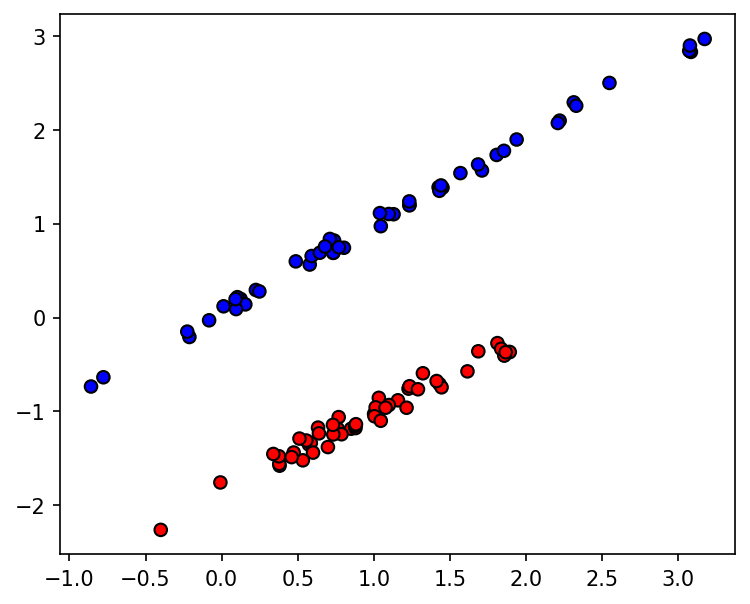

In [2]:
dataset.plot_dataset(X,y)

## Gli algoritmi di apprendimento baseline

Cominciamo col vedere un esempio di classificatore dummy (finto) che ci da un riferimento di quanto il nostro sistema di classificazione debba andare meglio, pensiamo a questo classificatore come un minimo sindacale.

Con questo classificatore introduciamo anche il concetto di metrica ovvero una misura di quanto il nostro sistema sta andando bene (o male). 

Supponiamo che il nostro dataset abbia 3 righe e che le etichette di esso siano:

$$
\begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

supponiamo che il nostro classificatore dummy dia come risultato :

$$
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix}
$$


il nostro classificatore 2 volte su 3 darebbe un risultato corretto cioè nel 67% dei casi avremmo risultato che ci aspettiamo.
questa metrica in sklearn si chiama [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) qui sotto un esempio di elaborazione usando un classificatore dummy.

Il classificatore dummy lavora con le seguenti strategie:

* most_frequent il classificatore ritorna sempre la classe con più frequente nel dataset
* uniform il classificatore ritorna una delle classi in modo randomico
* stratified viene dato un risultato in modo randomico ma rispettando la distribuzione delle classi
* prior ritorna sempre la classe più fequente ma viene anche restituta la probabilità della stessa con il metodo ``predict_proba``
* constant viene sempre ritornato un valore costante impostato dall'utente con il parametro ``constant``

Nel nostro dataset, essendo diviso in modo equo, stimiamo una accuratezza del 50% per il momento tralasciamo cosa fa il codice.

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X,y)
dummy_classifier.score(X, y)

0.5

In [4]:
dummy_classifier = DummyClassifier(strategy="stratified")
dummy_classifier.fit(X,y)
dummy_classifier.score(X, y)

0.57

## Funzionamento di un classificatore

Il primo passo per capire il funzionamento di un classificatore sarà quello di costruirci un algoritmo di apprendimento automatico.
Partremo da un algoritmo storico per poi iniziare ad usare i classificatori che sklearn ci mette a disposizione.

### I primordi del machine learning 

Nel 1943 cercando di carpire il funzionamento del cervello bioloco al fine di reimplementarlo nell'intelligenza artificale Warren McCulloch e Walter Pitts preparano un primo schema molto semplificato del funzionamento di una cellula del cervello (neurone).

![neurone](./images/neurone.png)

Essenzialmente semplificando molto i dati in ingresso vengono valutati e se viene superata una soglia interna questi si attiva, non è interesse nel nostro corso entrare nel dettaglio biologico.

Pochi anni dopo Frank Rosenblatt escogita il primo algoritmo affinchè l'implementazione elettronica del neurone artificiale riesca a capire i pesi necessari da moltiplicare ai segnali di ingresso affinchè il neurone si attivi correttamente.

![perceptron](./images/perceptron.png)

l'uscita del nostro percettrone potrà avere due stati 1 attivato e -1 spento, abbiamo poi i nostri pesi $w$ che verranno moltiplicati al vettore delle feature in ingresso $x$ e sommati per ottenere un singolo risultato con un pochino di intuito si capisce che questo è un prodotto scalare:

Facciamo un semplice esempio:
$$
    \begin{pmatrix} 1 & 2 & 3 \end{pmatrix} \cdot \begin{pmatrix} 4 \\ 5 \\ 6 \end{pmatrix} = 1 * 4 + 2 * 4 + 3 * 6
$$

definiamo ora una semplice funzione di soglia $\phi(z)$ che restituisce 1 se il valore è superiore o uguale alla soglia (un numero che imposteremo noi) -1 altrimenti.

L'algoritmo lavora in questo modo:

* imposta a 0 tutti i valori di $w$ 
* per ogni riga del dataset di addestramento $x^i$, i rappresenta una riga qualunque del dataset, svolgere i seguenti passi:
    * calcolare il valore di output $\hat{y}^i$ (previsione)
    * aggiornare i pesi $w$ in modo da migliorare il risultato


Come funziona il passo di aggiornamento del peso?
Si potrebbe calcolare un valore per ogni peso $w_j$ pari $\Delta w_j$ (j rappresenta il numero di feature del dataset) da sommare allo stesso, questo valore sarà 0 se la previsione è corretta oppure un valore positivo o negativo se la previsione è errata, in modo da abbassare il più possibile gli errori.

Definiamo anche un'altro parametro importante $\eta$ un numero reale che rappresenta il tasso di apprendimento compreso tra 0.0 e 1.0, il cui scopo è aiutare a far convergere l'algoritmo verso la soluzione corretta una specie di pedale dell'acceleratore.

Possiamo dunque esprimere $\Delta w_j$ nel seguente modo:

$$\Delta w_j = \eta * \left( y^i - \hat{y}^i  \right) * x^i$$

Facciamo tre esempi per capire il comportamento supponendo che $\eta$ sia 0.2:

* se la previsione è corretta cioè che $y^i = \hat{y}^i$ il che implica che $y^i - \hat{y}^i = 0$ perciò $\Delta w_j$ non verrà aggionato.

* se la previsione è errata con $y^i = 1$ e $\hat{y}^i = -1$ dovremmo far in modo di correggere il colpo la nostra formula verrà impostata come $0.2 * (1 + 1) = 0.4$ che verrà moltiplicato ad ogni feature $x^i$

* se la previsione è errata con $y^i = -1$ e $\hat{y}^i = 1$ dovremmo far in modo di correggere il colpo la nostra formula verrà impostata come $0.2 * (-1 - 1) = -0.4$ che verrà moltiplicato ad ogni feature $x^i$

abbiamo dunque introdotto una retroazione che farà convergere il sistema alla soluzione desiderata.
Potremmo pensare di aver trovato una miniera d'oro e di aver risolto tutti i potenziali problemi di machine learning, ma purtoppo il percettrone riuscirà a trovare una soluzione solo se le classi del nostro problema sono separabili linearmente, e questo è il caso del nostro dataset.

### Implementazione in pyhton

Cominciamo a scrivere il codice del nostro classificatore utilizzando i concetti descritti prima, utilizzeremo un approccio a classi in quanto anche sklearn lo usa e imiteremo il suo comportamento per rendere più comprensibili alcuni concetti della stessa libreria.

Il metodo ``fit`` viene utilizzato per calcolare i pesi $w$ mentre per eseguire le previsioni su dati nuovi si utilizzerà il metodo ``predict`` (stessa regola vale per tutti gli altri algoritmi in sklearn)


In [5]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [6]:
ppn = Perceptron(eta=0.1,n_iter=10)

#serve per aggiustare il dataset l'etichetta negativa nel dataset di partenza e 0
y1 = np.where(y == 1,1,-1)

ppn.fit(X,y1)

ecco fatto abbiamo addestrato il nosto primo algoritmo di machine learning, solo per curiosità andiamo a controllare i pesi $w$ e come si è comportato l'algoritmo andando a visualizzare il numero di errori per ogni iterazione del dataset

In [7]:
ppn.w_

array([ 0.41624345, -0.41560592,  0.47404033])

Text(0, 0.5, 'Numero errori')

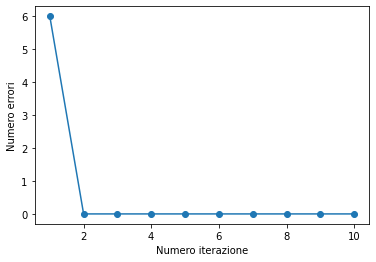

In [8]:
import matplotlib.pyplot as plt

epochs = range(1,len(ppn.errors_) +1)
plt.plot(epochs,ppn.errors_,marker='o')

plt.xlabel("Numero iterazione")
plt.ylabel("Numero errori")

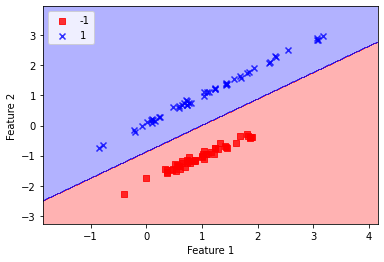

In [9]:
dataset.plot_decision_region(X,y1,ppn)

Come si vede il sitema è riuscito a calcolare una regola per dividere i due insiemi correttamente, ma come detto come si comporterebbe l'algoritmo su un dataset non lineare?

Vediamolo subito

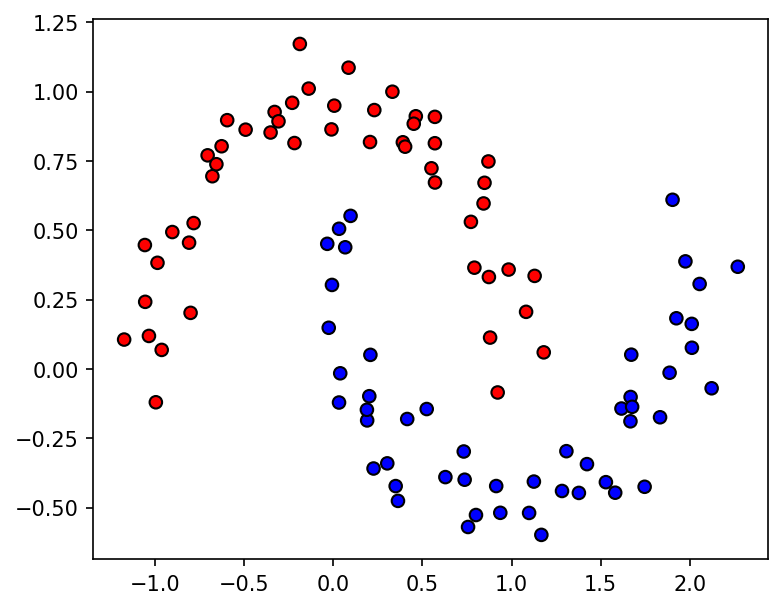

In [10]:
X,y = dataset.create_moon_dataset(separation=0.1)
dataset.plot_dataset(X,y)

y1 = np.where(y == 1,1,-1)

In [11]:
ppn.fit(X,y1)

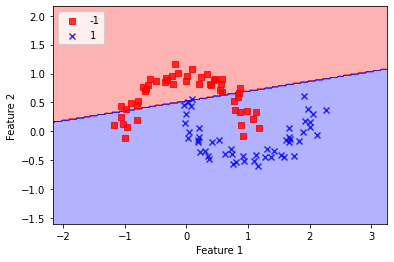

In [12]:
dataset.plot_decision_region(X,y1,ppn)

In [13]:
yhat = ppn.predict(X)
accuracy_score(y1,yhat)

0.83

### La discesa del gradiente

Introduciamo il concetto di **funzione di costo** o **funzione obiettivo** il compito di questa funzione è indicarci quanto siamo lontani dalla soluzione. 

Questa funzione ci dice che più è alto il costo più siamo lontani dalla soluzione, la funzione di costo inoltre deve avere una proprietà geometrica importante deve essere convessa e differenziabile, la prima parte ci garantisce che esista un minimo e la seconda ci permette di usare un algoritmo che sta alla base del machine learning la discesa del gradiente.

Possiamo pensare la discesa del gradiente come una discesa lungo un pendio, ad ogni passo calcoliamo il gradiente e ci muoviamo nella direzione opposta 

![gradiente](./images/gradiente.png)

Definiamo allora una funzione obiettivo che potrebbe fare al caso nostro, i valori che vorremmo avere ad esempio dovrebbero essere:

* se $\hat{y}^i = y^i$ allora la funzione ha valore 0
* se $\hat{y}^i \neq y^i$ allora la funzione assume un valore molto grande positivo

Possiamo definire perciò una funzione di costo del tipo:

* se $y = 1$ definiamo il costo come $−log(\hat{y})$
* se $y = 0$ definiamo il costo come $−log(1−\hat{y})$



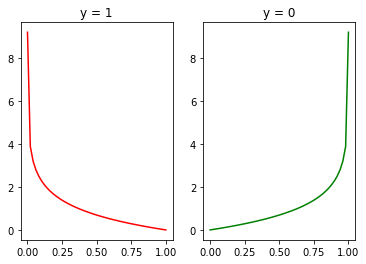

In [14]:
x = np.linspace(0.0001,0.9999)
y = -np.log(x)
y1 = -np.log(1 - x)

plt.subplot(1,2,1)
plt.plot(x,y,'r')
plt.title("y = 1")
plt.subplot(1,2,2)
plt.title("y = 0")
plt.plot(x,y1,'g')

possiamo unire i due rami sopra con la formula 
$$	\frac{1}{m} \sum_{i=1}^m \left(−y^i log(\hat{y}^i) − (1−y^i) log(1−\hat{y}^i) \right)$$

### La funzione sigmoide

Se invece di usare una funzione gradino usassimo una funzione derivabile (che può essere usata nella discesa del gradiente), che prende in ingresso un numero e restituisce un valore compreso tra 0 e 1 (la probabilità che questo evento accada o meno) potremmo utilizzarla al posto della funzione gradino del perceptron otterremo dunque un sistema simile a questo.

![regressione](./images/regressioneLogistica.png)

Ma analizziamo come è fatta questa funzione, tralasciamo i passaggi che portano a questa funzione e vediamola direttamente.


In [15]:
def sigmoid(x,b1 = 1,b0 = 0):
    return 1 / (1 + np.exp(-(b1*x + b0)))

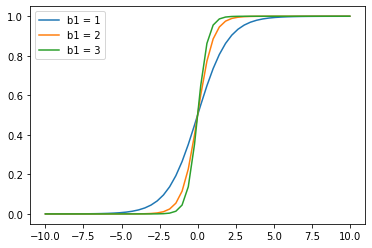

In [16]:
x = np.linspace(-10,10)
y0 = sigmoid(x)
y1 = sigmoid(x,2)
y2 = sigmoid(x,3)

plt.plot(x,y0,label="b1 = 1")
plt.plot(x,y1,label="b1 = 2")
plt.plot(x,y2,label="b1 = 3")

plt.legend(loc="upper left")

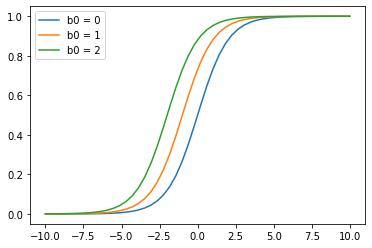

In [17]:
x = np.linspace(-10,10)
y0 = sigmoid(x)
y1 = sigmoid(x,b0=1)
y2 = sigmoid(x,b0=2)

plt.plot(x,y0,label="b0 = 0")
plt.plot(x,y1,label="b0 = 1")
plt.plot(x,y2,label="b0 = 2")

plt.legend(loc="upper left")

come vedete b0 non fa altro che spostare a sinistra o a destra la nostra sigmoide mentre b1 determina la velocità del cambio di valore tra 0 e 1 (Probabilità)

Abbiamo un sistema che ci dice non solo la classe ma anche la sua probabilità.

Un bel passo in avanti, qui sotto visualizziamo il comportamento dell'algoritmo,andando a visualizzare su un grafico il confine decisionale 

In [18]:
X,y = dataset.create_simple_dataset()

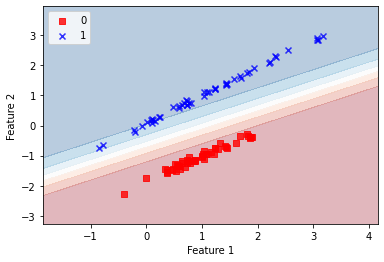

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)

dataset.plot_decision_region_proba(X,y,clf)

se usiamo il metodo ``predict_proba`` ci verrà restituita la probabilità di appartenenza di ogni classe

In [20]:
clf.predict_proba(X[:1, :])

array([[0.93320175, 0.06679825]])

se usiamo il metodo ``predict`` ci verrà restituita la classe di appartenenza

In [21]:
clf.predict(X[:1, :])

array([0])

la proprietà ``coef_`` ci restituisce i pesi che il sistema ha imparato

In [22]:
clf.coef_

array([[-1.88643558,  3.1317861 ]])

Velocemente vediamo anche il metodo ``get_params`` che mostra la configurazione interna dell'algoritmo.
Ma secondo voi cosa può essere il parametro ``C`` ?

In [23]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## La regolarizzazione dei pesi

Cominciamo ad affrontare un argomento che ci seguirà fino alla fine del nostro corso ovvero l'overfitting.
Torniamo per un secondo alla base di quello che si vuol fare, l'idea è quella di estrarre una regola dai dati in nostro possesso per poterla usare sui dati futuri ma vediamo cosa potrebbe succedere analizzando le tre casistiche qui sotto.

![overfitting](./images/overfitting_2.png)

Nella prima immagine a sinistra siamo di fronte ad un modello che mostra i suoi limiti e che non riesce a cattura bene già nella fase di addestramento, come soluzione possiamo aumentare la complessità del modello.

Nell'ultima immagine invece siamo di fronte al problema opposto il modello si comporta molto bene nella fase di addestramento ma altrettanto nella fase di previsione, abbiamo messo troppa complessità nel modello.

Nella figura centrale invece abbiamo si è raggiunto un buon compromesso.

Come possiamo ottenere un buon compromesso?
Bhe potremmo fare in modo di limitare i pesi del modello a volori non estremi e questo si ottiene tramite la regolarizzazione che aggiunge un ulteriore pezzo alla funzione di costo al fine di cercare di ridurre l'effetto del rumore dei dati. 

La forma più comune di regolarizzazione si chiama **regolarizzazione L2** e si esprime in questo modo: $$ \frac{\lambda}{2} \lVert w \rVert^2 $$ e può essere riscritta come:

$$ \frac{\lambda}{2} \sum_{j=1}^{m} w_j^2 $$

Il parametro $\lambda$ è un numero che decidiamo noi a piacere e più grande sarà più piccoli saranno i valori dei pesi $w$.
Per convenzione è per essere in linea con un'altro algoritmo di classificazione definiamo C come $$C=\frac{1}{\lambda}$$
questo fa si che più grande è C più grande saranno i possibili pesi $w$.
Vediamo una dimostrazione pratica

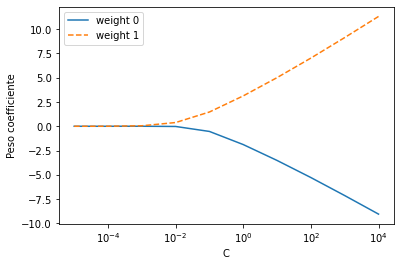

In [24]:
weights = []
params  = []
models  = []

limit = 5
for c in np.arange(-limit,limit):
    C = float(10)**c
    clf = LogisticRegression(C=C,random_state=42)
    clf.fit(X, y)
    weights.append(clf.coef_[0])
    params.append(C)
    models.append(clf)
    
weights = np.array(weights)

plt.plot(params,weights[:,0],label="weight 0")
plt.plot(params,weights[:,1],label="weight 1",linestyle="--")
plt.xscale('log')
plt.ylabel('Peso coefficiente')
plt.xlabel('C')
plt.legend()

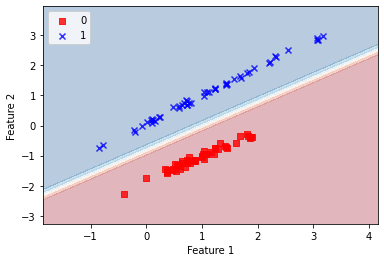

In [25]:
#vediamo come si comporta la  regressione logistica con un valore C grande
dataset.plot_decision_region_proba(X,y,models[-1])

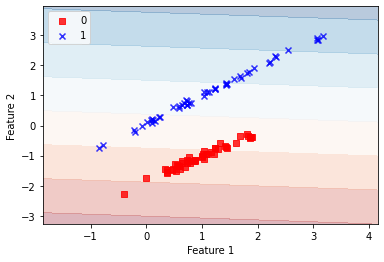

In [26]:
#vediamo come si comporta la  regressione logistica con un valore C piccolo
dataset.plot_decision_region_proba(X,y,models[0])

## Classificazione tramite macchine a vettori di supporto

Nelle macchine a vettori di supporto (Support Vector Machine) o SVM l'obiettivo principale consiste nel massimizzare il margine. 

L'idea è quella di trovare il migliore separatore possibile della nostra classe positiva e negativa possibilmente il più lontano possibile dalle due. 
I concetti dell'algoritmo sono molto simili al perceptron visto prima.

![separation](./images/separation.png)

Come possiamo insegnare ad un computer a calcolare il separatore corretto? Il perceptron calcola si un separatore ma non è detto che questo sia il migliore possibile. 
Noi vorremmo essere quanto più lontano dalle due classi da separare

### Le linee di separazione
Per calcolare la distanza tra le due classi abbiamo bisogno di definire il concetto di linee di separazione.
Consideriamo l'equazione $2x_1+3x_2-6 = 0$ e l'equazione $x_1+1.5x_2-3 = 0$, queste sono lo stesso separatore.
Ma se definiamo l'equazione $2x_1+3x_2-6 = 1$ e $2x_1+3x_2-6 = -1$ otterremo due linee parallele equidistanti dal separatorel le linee di separazione.

Ma guardiamo come si comportano le linee di separazione, se notate più sono grandi i pesi $w$ piu le linee di separazione sono vicine.
![separation](./images/separationLine.png)

### Funzione di costo

Ora con il concetto visto prima definiamo la funzione di costo, calcolando la distanza tra i punti non classificati correttamente e la distanza delle linee di separazione che deve essere maggiore possibile

![separation](./images/svmCostFunction.png)

Dunque per la parte delle nostre misure positiva $y^{(i)} = 1$ noi vogliamo che sia soddisfatta l'equazione 

$$w_0 + w^T x^{(i)} \geq 1$$ 

Per i campioni negativi $y^{(i)} = -1$ invece vogliamo che sia valida l'equazione 

$$w_0 + w^T x^{(i)} \leq -1$$ 

Perciò possiamo mettere su un grafico il costo nel seguente modo:

![separation](./images/svmCostFunction2.png)

in termini di codice puo essere scritto come:

+ per $y = 1$ si può scrivere $max(0,1 - w_0 + w^Tx)$
+ per $y = -1$ si può scrivere $max(0,1 + w_0 + w^Tx)$

ora le due equazioni sopra possono essere riunite in una sola scrivendo

$$y^i (w_0 + w^T x^{(i)}) \geq 1$$ 

che ci porta a riscrivere la funzione di costo come:

$$max(0,1 - y^i(w_0 + w^Tx))$$

per il secondo pezzo della funzione abbiamo visto che il margine può essere espresso come:

$$ \frac{2}{\lVert w \rVert} $$

ma questa è una funzione che deve essere massimizzata e noi stiamo scrivendo una funziona che deve essere minimizzata, basterà semplicemente riscriverla come:

$$ \frac{1}{2} \lVert w \rVert $$

ora dobbiamo unire i due pezzi per costruire una funzione di costo unica

$$ \sum_{n=1}^{n} [max(0,1 - y^i(w_0 + w^Tx))] + \frac{1}{2} \lVert w \rVert $$

ci siamo quasi dobbiamo solo avere la possibilità di poter dare importanza ai due rami della somma, cioè volgiamo scegliere se è piu importante minimizzare la parte del costo di classificazione o il costo del margine.

Questo lo si fà riutilizzando il parametro C visto prima, perciò la nostra equazione finale sarà:

$$ \sum_{n=1}^{n} C[max(0,1 - y^i(w_0 + w^Tx))] + \frac{1}{2} \lVert w \rVert $$

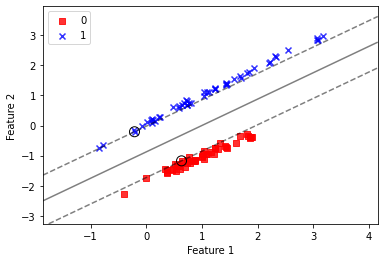

In [27]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=10)
svm.fit(X, y)

dataset.plot_separating_hyperplane(X,y,svm)

## Soluzione dei problemi non lineari

Fino ad ora abbiamo visto come trattare problemi le cui classi risultavano separabili linearmente, ma come abbiamo visto nel primo esempio non tutti i problemi da risolvere sono così semplici.

Una prima soluzione possibile è l'utilizzo di un *kernel* , l'idea si basa sulla creazione di combinazioni non lineari per proiettare i nostri dati su uno spazio in cui gli stessi siano separabili linearmente.

Facciamo un esempio pratico prendiamo il dataset

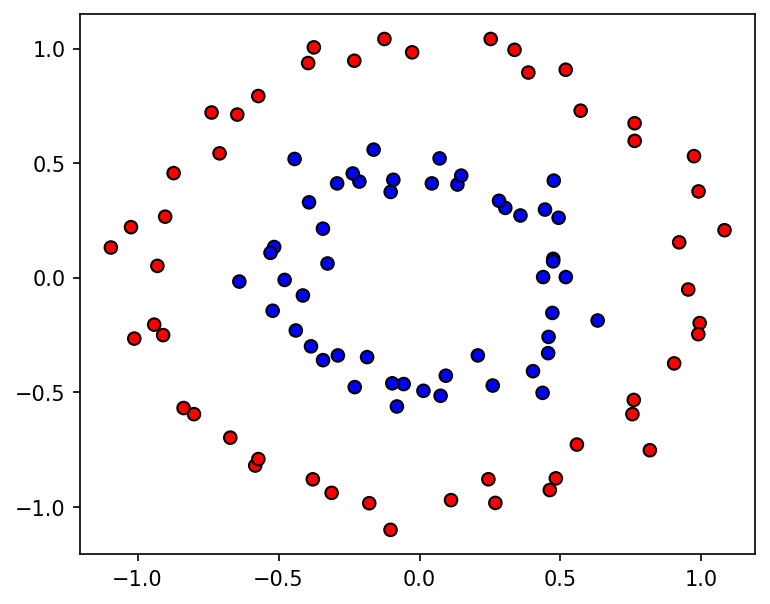

In [28]:
X,y = dataset.create_circle_dataset(separation=0.06)
dataset.plot_dataset(X,y)

e consideriamo la funzione kernel 

$$\phi(x_1,x_2) = (z_1,z_2,z_3)$$

come 

$$(z_1,z_2,z_3) = x_1,x_2,x_1^2 + x_2^2$$

il risultato sarà il seguente

Text(0.5, 0, 'New Feature')

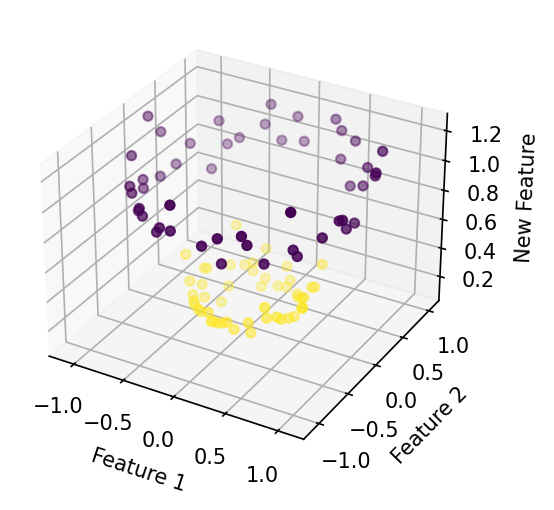

In [29]:
kernel = np.expand_dims(X[:, 0] ** 2 + X[:, 1] ** 2,axis=1)
Xk = np.hstack((X,kernel))

fig = plt.figure(figsize=(5,4),dpi=150)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xk[:,0], Xk[:,1], Xk[:,2], c=y)


ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('New Feature')


In [30]:
svm = SVC(kernel='linear',C=10)
svm.fit(Xk, y)
svm.score(Xk, y)

1.0

In [31]:
svm.fit(X, y)
svm.score(X, y)

0.55

ora come vedete il sistema proposto da sklearn supporta già dei kernel predefiniti proviamo ad esempio ad utilizzare uno dei seguenti kernel :

+ poly
+ rbf
+ sigmoid

In [32]:
svm = SVC(kernel='rbf',C=10)
svm.fit(X, y)

SVC(C=10)

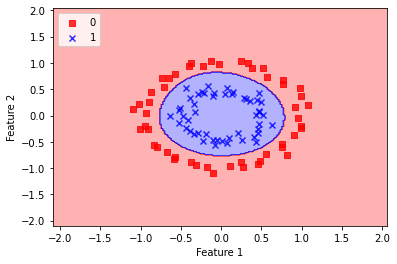

In [33]:
dataset.plot_decision_region(X,y,svm)

In [34]:
X,y = dataset.create_moon_dataset(separation=0.1)
svm = SVC(kernel='rbf',C=10)
svm.fit(X, y)

SVC(C=10)

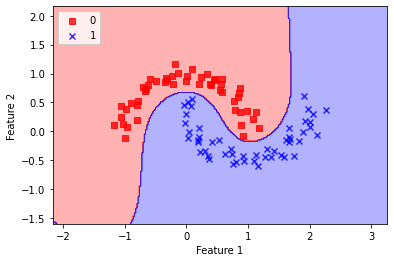

In [35]:
dataset.plot_decision_region(X,y,svm)

ora tralasciando molti dettagli tecnici l'utilizzo del kernel introduce un nuovo iperparametro $\gamma$ che regola la morbidità della curva facciamo un esempio con due parametri differenti 

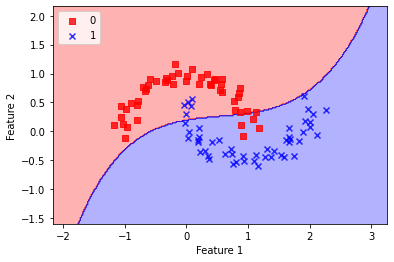

In [36]:
svm = SVC(kernel='rbf',C=10,gamma=0.1)
svm.fit(X, y)
dataset.plot_decision_region(X,y,svm)

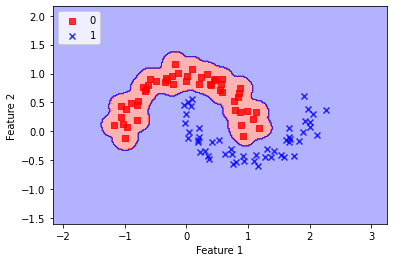

In [37]:
svm = SVC(kernel='rbf',C=10,gamma=100)
svm.fit(X, y)
dataset.plot_decision_region(X,y,svm)

come vedete anche il parametro $\gamma$ inficia il problema dell'overfitting

## Gli alberi decisionali

Passiamo ora ad un altra classe di algoritmi non lineari, parliamo di alberi decisionali. Questa classe di algoritmi divide i nostri dati in base a delle decisioni.

Consideriamo l'esempio qui sotto, che rappresenta le ipotetiche decisioni di una giornata

![decision tree](./images/decisionTree.png)

Sulla base del nostro dato in ingresso l'algoritmo impara a dividere il dato in sottoinsiemi il più possibile uguali, da notare che più profondo sarà il nostro albero più correremo il rischio di incappare in un problema di overfitting.

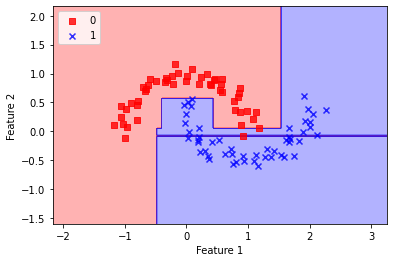

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)
dataset.plot_decision_region(X,y,clf)

In [39]:
clf.score(X, y)

1.0

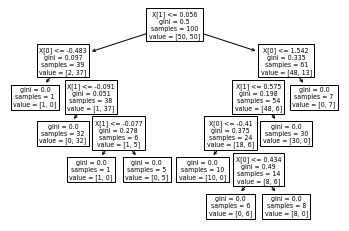

In [40]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

## combinare un insieme di modelli deboli per ottenere un modello più potente

Passiamo ora ad un versione potenziata e molto usata degli alberi decisionali, parliamo del sistema **RandomForest**.
Possiamo pensare a questo sistema come ad un insieme di alberi decisionali che combinati assieme restituiscono la soluzione.
Questo apprendimento di insieme dovrebbe rendere il sistema più forte e limitare il problema di overfitting.
L'algoritmo può essere spiegato in quattro passi:

* Scelgo un campione casuale di dimensione n (bootstrap) 
* Faccio crescere un albero decisionale su quel campione nel miglior modo possibile scegliendo un sottoinsieme delle features d
* ripeto i passi sopra per k volte
* aggrego il risultato usando una votazione di maggioranza

Il parametro k ci dice quanti alberi decisionali andremo ad addestrare tipicamente all'aumentare di k aumentano le prestazioni ma attenzione all'overfitting. 

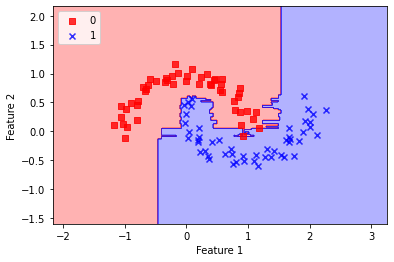

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X, y)

dataset.plot_decision_region(X,y,clf)

## i k più vicini 

Il prossimo algoritmo di cui apprendimento **KNN** *k-nearest neighbor classifier* e ragiona in modo differenti dagli altri. Invece di creare una funzione che discrimina il dato, l'algoritmo memorizza il dataset di addestramento.

Lo schema di funzionamento può essere riassunto nel seguente modo:
* va scelto un parametro k e una metrica di distanza
* trovare i k elementi più vicini del campione che vogliamo classificare
* assegnare l'etichetta corretta in base ad un voto di maggioranza

![knn](./images/knn.png)


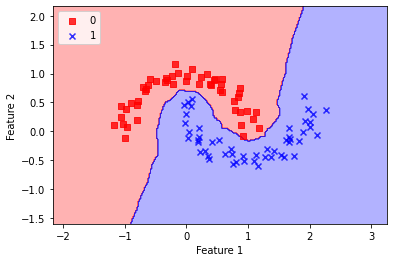

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X, y)

dataset.plot_decision_region(X,y,knn)